In [1]:
# Step 1: Load and Prepare the Ethereum Dataset

import pandas as pd

# Load the dataset
#file_path = "/Users/saichaitanyaballa/Downloads/Ethereum_2018_To_Present.csv"  # Make sure this file is in your working directory
file_path = "Ethereum_2018_To_Present.txt"  # Make sure this file is in your working directory
df = pd.read_csv(file_path)
# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%m/%d/%Y %H:%M')
# Drop unnecessary columns: 'Date', 'Time', and 'OI' since OI is all zeros
df.drop(['Date', 'Time', 'OI'], axis=1, inplace=True)
# Reorder the columns for better readability
df = df[['Datetime', 'Open', 'High', 'Low', 'Close', 'Vol']]
# Print the first few rows to confirm
print(df.head())
# Check data types to confirm 'Datetime' is correctly formatted
print(df.dtypes)

             Datetime    Open    High     Low   Close    Vol
0 2018-02-15 15:59:00  932.87  948.23  917.70  931.49  36583
1 2018-02-16 15:59:00  931.49  944.92  910.80  939.92  41651
2 2018-02-19 15:59:00  939.95  973.73  911.00  935.02  24549
3 2018-02-20 15:59:00  935.03  957.89  914.00  916.17  36551
4 2018-02-21 15:59:00  916.17  916.18  817.01  827.00  61992
Datetime    datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Vol                  int64
dtype: object


In [2]:
# Step 2: Handling Missing Values

# Check how many missing values are in each column
print("Missing values per column:")
print(df.isnull().sum())
# Option 1: Interpolate missing numeric values (best for time series)
#df.interpolate(method='linear', inplace=True)
# Option 2: Forward fill (use previous value)
# df.fillna(method='ffill', inplace=True)
# Double-check to make sure there are no missing values left
print("\nAfter filling missing values:")
print(df.isnull().sum())


Missing values per column:
Datetime    0
Open        0
High        0
Low         0
Close       0
Vol         0
dtype: int64

After filling missing values:
Datetime    0
Open        0
High        0
Low         0
Close       0
Vol         0
dtype: int64


In [3]:
# Step 3: Feature Engineering (Improved version)

# Basic Features
df['Daily_Range'] = df['High'] - df['Low']
#df['Price_Change'] = df['Close'] - df['Open']
df['%Change_CMinusO_1DayPct'] = ((df['Close'] - df['Open']) / df['Open'])
df['%Change_CMinusO_3DayPct'] = ((df['Close'] - df['Open'].shift(3)) / df['Open'].shift(3))
df['%Change_CMinusO_7DayPct'] = ((df['Close'] - df['Open'].shift(7)) / df['Open'].shift(7))
df['%Change_CMinusO_20DayPct'] = ((df['Close'] - df['Open'].shift(20)) / df['Open'].shift(20))    

df['ClosePctile_1Day']=(df['Close'] - df['Low']) / (df['High']-df['Low'])
df['ClosePctile_3Day']=(df['Close'] - df['Low'].rolling(3).min()) / (df['High'].rolling(3).max()-df['Low'].rolling(3).min())
df['ClosePctile_7Day']=(df['Close'] - df['Low'].rolling(7).min()) / (df['High'].rolling(7).max()-df['Low'].rolling(7).min())
df['ClosePctile_20Day']=(df['Close'] - df['Low'].rolling(20).min()) / (df['High'].rolling(20).max()-df['Low'].rolling(20).min())
                                 
df['%Close_1d']=df['Close'].pct_change(1)
df['%Close_3d']=df['Close'].pct_change(3)
df['%Close_7d']=df['Close'].pct_change(7)
df['%Close_20d']=df['Close'].pct_change(20)                                 
                                 
                                 
df['MA_3'] = df['Close'].rolling(window=3).mean()                                 
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

# Additional Advanced Features (recommended by professor)
df['MA_3Slope'] = df['MA_3'].pct_change()                             
df['MA_7Slope'] = df['MA_7'].pct_change()
df['MA_30Slope'] = df['MA_30'].pct_change()
                                 
df['MA_3Pct'] = df['Close']/df['MA_3']              
df['MA_7Pct'] = df['Close']/df['MA_7']
df['MA_30Pct'] = df['Close']/df['MA_30']
                                 
#Close and Volume rolling ZScores
                                 
df['ZscoreClose']=(df['Close']- df['Close'].rolling(window=30).mean())/df['Close'].rolling(window=30).std()
df['ZscoreVolume']=(df['Vol']- df['Vol'].rolling(window=30).mean())/df['Vol'].rolling(window=30).std()

                                 
                                 
display(df)

,Datetime,Open,High,Low,Close,Vol,Daily_Range,%Change_CMinusO_1DayPct,%Change_CMinusO_3DayPct,%Change_CMinusO_7DayPct,...,MA_7,MA_30,MA_3Slope,MA_7Slope,MA_30Slope,MA_3Pct,MA_7Pct,MA_30Pct,ZscoreClose,ZscoreVolume
0,2018-02-15 15:59:00,932.87,948.23,917.70,931.49,36583,30.53,-0.001479,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-16 15:59:00,931.49,944.92,910.80,939.92,41651,34.12,0.009050,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-19 15:59:00,939.95,973.73,911.00,935.02,24549,62.73,-0.005245,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.999512,NaN,NaN,NaN,NaN
3,2018-02-20 15:59:00,935.03,957.89,914.00,916.17,36551,43.89,-0.020170,-0.017902,NaN,...,NaN,NaN,-0.005459,NaN,NaN,0.984737,NaN,NaN,NaN,NaN
4,2018-02-21 15:59:00,916.17,916.18,817.01,827.00,61992,99.17,-0.097329,-0.112175,NaN,...,NaN,NaN,-0.040457,NaN,NaN,0.926372,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,2025-05-08 15:59:00,1798.44,2199.25,1796.38,2178.23,190153,402.87,0.211177,0.186206,0.219334,...,1863.148571,1738.916000,0.068684,0.028986,0.003293,1.136254,1.169112,1.252637,2.958263,0.662972
1882,2025-05-09 15:59:00,2185.62,2490.66,2158.52,2340.32,436340,332.14,0.070781,0.293852,0.293466,...,1941.312857,1754.344000,0.098143,0.041953,0.008872,1.111701,1.205535,1.334014,3.195948,2.944105
1883,2025-05-12 15:59:00,2510.89,2625.00,2407.41,2486.82,136076,217.59,-0.009586,0.400670,0.386365,...,2033.545714,1776.594667,0.109233,0.047511,0.012683,1.064963,1.222898,1.399768,3.130837,-0.022095
1884,2025-05-13 15:59:00,2485.53,2739.05,2415.65,2689.16,114610,323.40,0.081926,0.495274,0.461246,...,2153.712857,1802.460333,0.072934,0.059092,0.014559,1.073331,1.248616,1.491939,3.157914,-0.243922


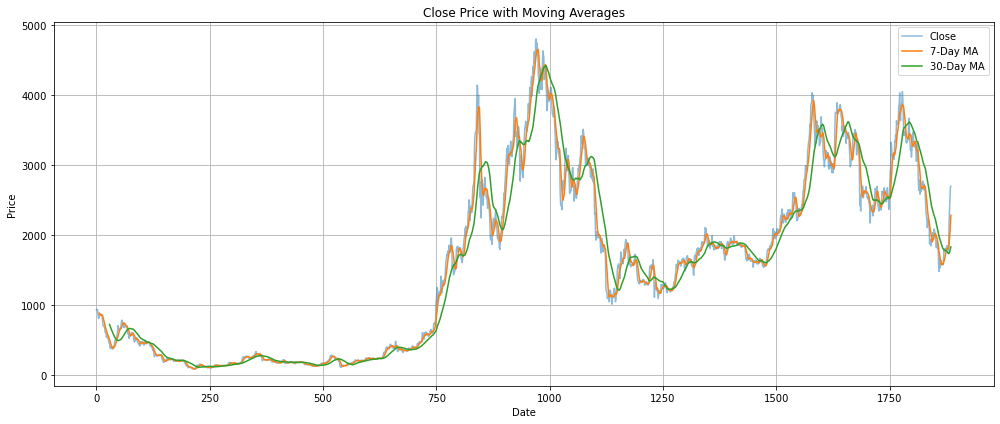

In [4]:
# Moving Averages Comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
#plt.plot(df['Datetime'], df['Close'], label='Close', alpha=0.5)
#plt.plot(df['Datetime'], df['MA_7'], label='7-Day MA')
#plt.plot(df['Datetime'], df['MA_30'], label='30-Day MA')

plt.plot(df['Close'], label='Close', alpha=0.5)
plt.plot(df['MA_7'], label='7-Day MA')
plt.plot( df['MA_30'], label='30-Day MA')



plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


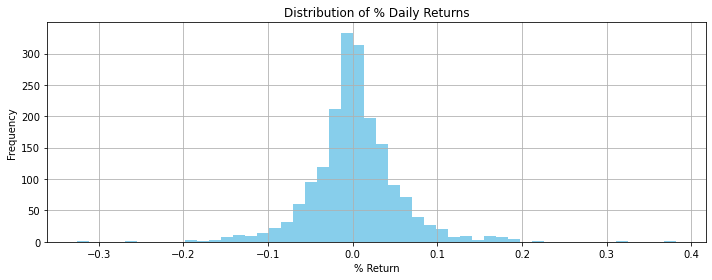

In [5]:
# distribution of Daily  Pricess

df['%Change_Close']=df['Close'].pct_change()
plt.figure(figsize=(10, 4))
df['%Change_Close'].hist(bins=50, color='skyblue')
plt.title('Distribution of % Daily Returns')
plt.xlabel('% Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# RSI
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0).rolling(window=period).mean()
    loss = -delta.clip(upper=0).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI_14'] = compute_rsi(df['Close'])

# Autocorrelation lag 1 (using pandas.Series.autocorr)
df['AutoCorr_Close_lag7'] = df['Close'].rolling(window=30).apply(lambda x: x.autocorr(lag=1) if x.count() > 1 else None)

'''# 3-day moving average of % change
df['MA_%Change_3d'] = df['%Change_Close'].rolling(window=3).mean()

# 7-day moving average of % change
df['MA_%Change_7d'] = df['%Change_Close'].rolling(window=7).mean()

# 30-day moving average of % change
df['MA_%Change_30d'] = df['%Change_Close'].rolling(window=30).mean()'''

# Rolling correlation (3-day) between Close and Volume
df['Corr_Close_Vol_30d'] = df['ZscoreClose'].rolling(window=30).corr(df['ZscoreVolume'])

'''# Rolling correlation (7-day) between Close and Volume
df['Corr_Close_Vol_7d'] = df['Close'].rolling(window=7).corr(df['Vol'])

# Rolling correlation (30-day) between Close and Volume
df['Corr_Close_Vol_30d'] = df['Close'].rolling(window=30).corr(df['Vol'])'''
df['YTarget']=df['Close'].pct_change(40).shift(-40)
df = df.set_index('Datetime')
display(df)
df=df.drop(columns=['Open', 'High', 'Low',  'Vol','MA_3','MA_7','MA_30','Daily_Range','%Change_Close'])#,'ZscoreClose','ZscoreVolume'])
display(df.columns)
display(df[['AutoCorr_Close_lag7']].describe())

,Open,High,Low,Close,Vol,Daily_Range,%Change_CMinusO_1DayPct,%Change_CMinusO_3DayPct,%Change_CMinusO_7DayPct,%Change_CMinusO_20DayPct,...,MA_3Pct,MA_7Pct,MA_30Pct,ZscoreClose,ZscoreVolume,%Change_Close,RSI_14,AutoCorr_Close_lag7,Corr_Close_Vol_30d,YTarget
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-02-15 15:59:00,932.87,948.23,917.70,931.49,36583,30.53,-0.001479,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.498653
2018-02-16 15:59:00,931.49,944.92,910.80,939.92,41651,34.12,0.009050,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.009050,NaN,NaN,NaN,-0.475892
2018-02-19 15:59:00,939.95,973.73,911.00,935.02,24549,62.73,-0.005245,NaN,NaN,NaN,...,0.999512,NaN,NaN,NaN,NaN,-0.005213,NaN,NaN,NaN,-0.462204
2018-02-20 15:59:00,935.03,957.89,914.00,916.17,36551,43.89,-0.020170,-0.017902,NaN,NaN,...,0.984737,NaN,NaN,NaN,NaN,-0.020160,NaN,NaN,NaN,-0.451357
2018-02-21 15:59:00,916.17,916.18,817.01,827.00,61992,99.17,-0.097329,-0.112175,NaN,NaN,...,0.926372,NaN,NaN,NaN,NaN,-0.097329,NaN,NaN,NaN,-0.368803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-08 15:59:00,1798.44,2199.25,1796.38,2178.23,190153,402.87,0.211177,0.186206,0.219334,0.301905,...,1.136254,1.169112,1.252637,2.958263,0.662972,0.212175,83.797947,0.697914,-0.186415,NaN
2025-05-09 15:59:00,2185.62,2490.66,2158.52,2340.32,436340,332.14,0.070781,0.293852,0.293466,0.529081,...,1.111701,1.205535,1.334014,3.195948,2.944105,0.074414,86.757609,0.801248,0.178095,NaN
2025-05-12 15:59:00,2510.89,2625.00,2407.41,2486.82,136076,217.59,-0.009586,0.400670,0.386365,0.563566,...,1.064963,1.222898,1.399768,3.130837,-0.022095,0.062598,87.045292,0.872085,0.148309,NaN


Index(['Close', '%Change_CMinusO_1DayPct', '%Change_CMinusO_3DayPct',
       '%Change_CMinusO_7DayPct', '%Change_CMinusO_20DayPct',
       'ClosePctile_1Day', 'ClosePctile_3Day', 'ClosePctile_7Day',
       'ClosePctile_20Day', '%Close_1d', '%Close_3d', '%Close_7d',
       '%Close_20d', 'MA_3Slope', 'MA_7Slope', 'MA_30Slope', 'MA_3Pct',
       'MA_7Pct', 'MA_30Pct', 'ZscoreClose', 'ZscoreVolume', 'RSI_14',
       'AutoCorr_Close_lag7', 'Corr_Close_Vol_30d', 'YTarget'],
      dtype='object')

,AutoCorr_Close_lag7
count,1857.000000
mean,0.850036
std,0.113670
min,0.249242
25%,0.793775
50%,0.879915
75%,0.933626
max,0.988280


Pct Change Period is 5
Correlation between ETH and ClosePctile_20Day: 0.10556495853292812



<Figure size 432x288 with 0 Axes>

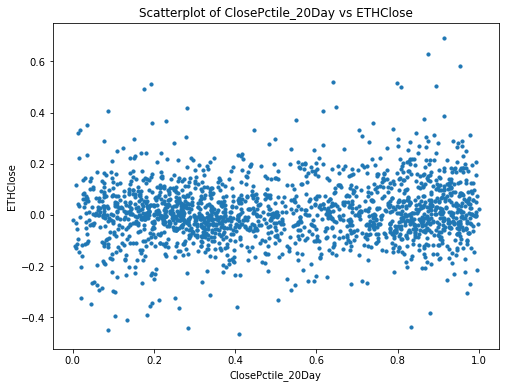

Pct Change Period is 5
Correlation between ETH and YTarget: 0.3388419716590044



<Figure size 432x288 with 0 Axes>

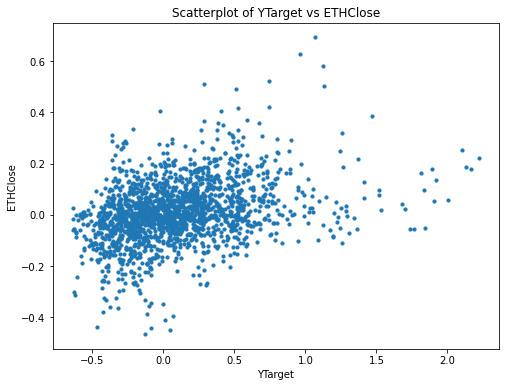

Pct Change Period is 10
Correlation between ETH and ClosePctile_20Day: 0.10576541678589199



<Figure size 432x288 with 0 Axes>

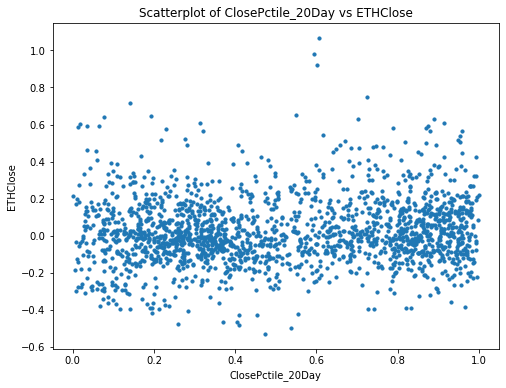

Pct Change Period is 10
Correlation between ETH and YTarget: 0.4921997243395234



<Figure size 432x288 with 0 Axes>

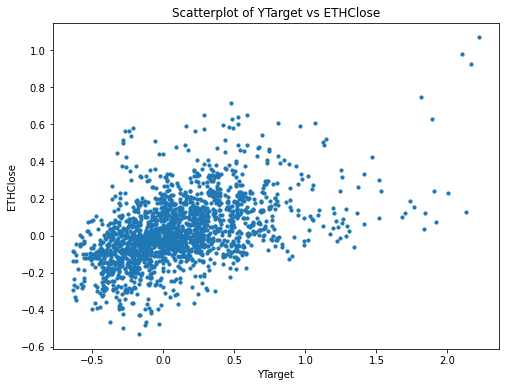

Pct Change Period is 15
Correlation between ETH and Corr_Close_Vol_30d: 0.1043974037892186



<Figure size 432x288 with 0 Axes>

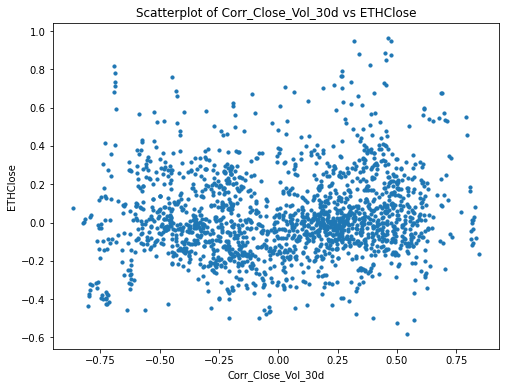

Pct Change Period is 15
Correlation between ETH and YTarget: 0.6071023847188033



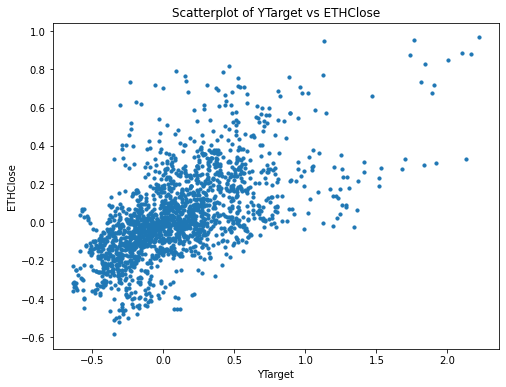

Pct Change Period is 20
Correlation between ETH and ZscoreClose: 0.11382221872589678



<Figure size 432x288 with 0 Axes>

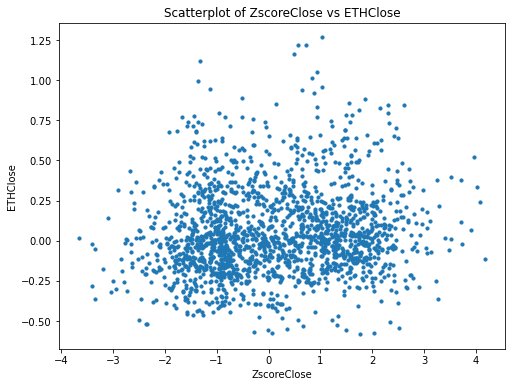

Pct Change Period is 20
Correlation between ETH and Corr_Close_Vol_30d: 0.1182580117698828



<Figure size 432x288 with 0 Axes>

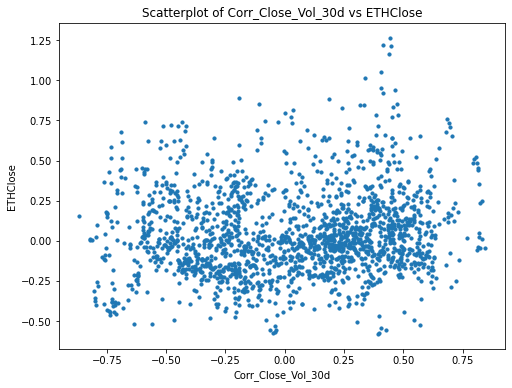

Pct Change Period is 20
Correlation between ETH and YTarget: 0.7133210362610638



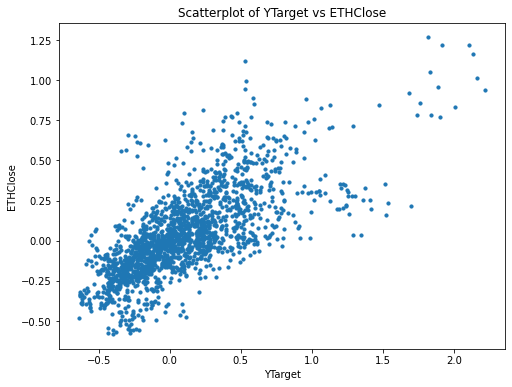

Pct Change Period is 25
Correlation between ETH and ZscoreClose: 0.10473635104243363



<Figure size 432x288 with 0 Axes>

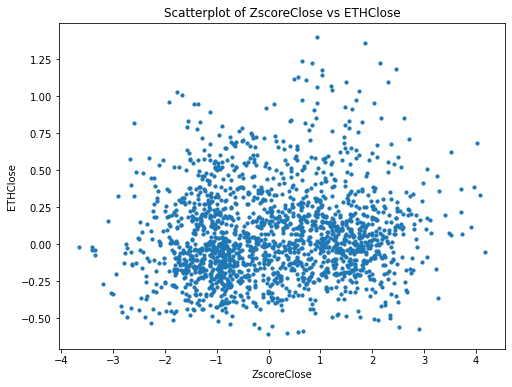

Pct Change Period is 25
Correlation between ETH and Corr_Close_Vol_30d: 0.11755580673536971



<Figure size 432x288 with 0 Axes>

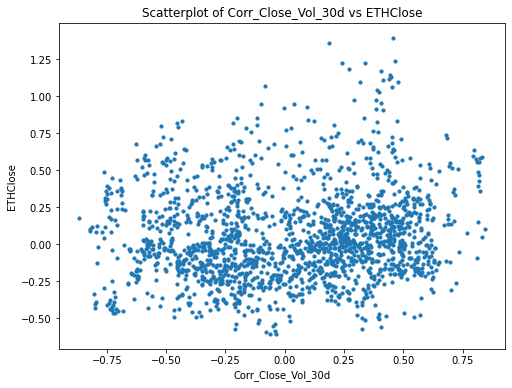

Pct Change Period is 25
Correlation between ETH and YTarget: 0.7898368360105272



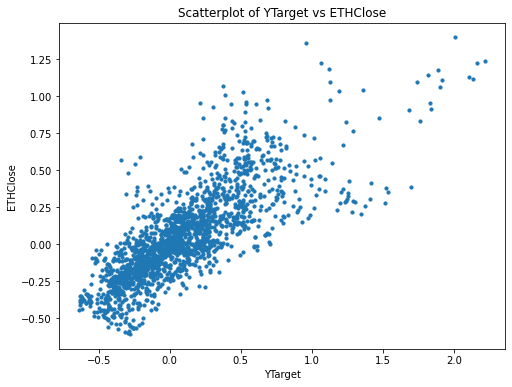

Pct Change Period is 30
Correlation between ETH and ZscoreClose: 0.10197024221888115



<Figure size 432x288 with 0 Axes>

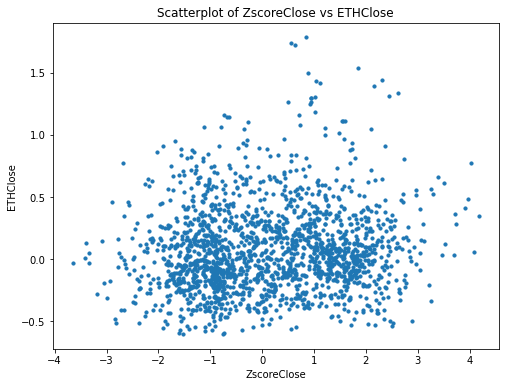

Pct Change Period is 30
Correlation between ETH and Corr_Close_Vol_30d: 0.11927644638554043



<Figure size 432x288 with 0 Axes>

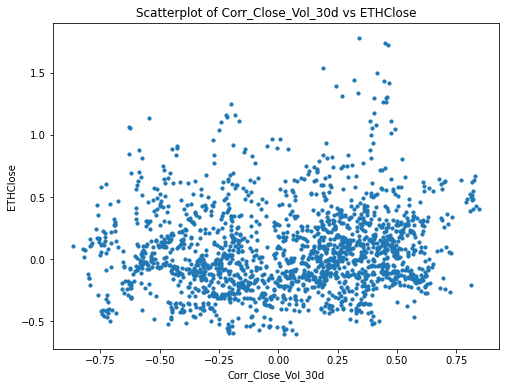

Pct Change Period is 30
Correlation between ETH and YTarget: 0.8674132455898144



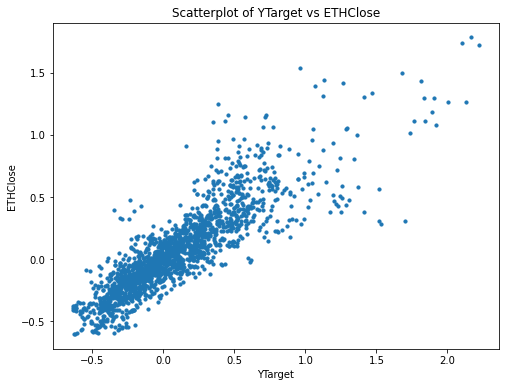

Pct Change Period is 35
Correlation between ETH and Corr_Close_Vol_30d: 0.12688654883190253



<Figure size 432x288 with 0 Axes>

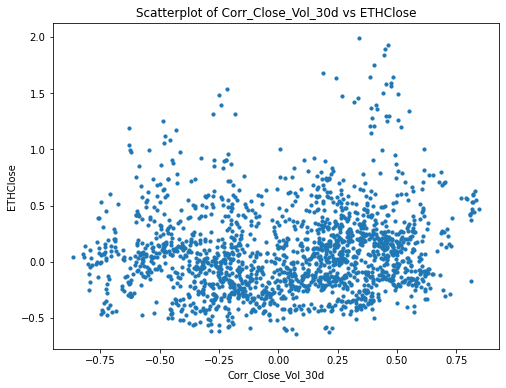

Pct Change Period is 35
Correlation between ETH and YTarget: 0.9352905404839391



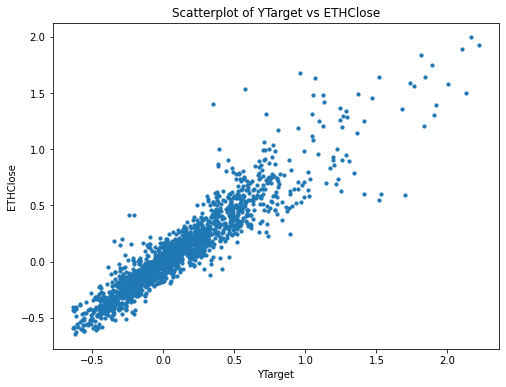

Pct Change Period is 40
Correlation between ETH and Corr_Close_Vol_30d: 0.13506200086370992



<Figure size 432x288 with 0 Axes>

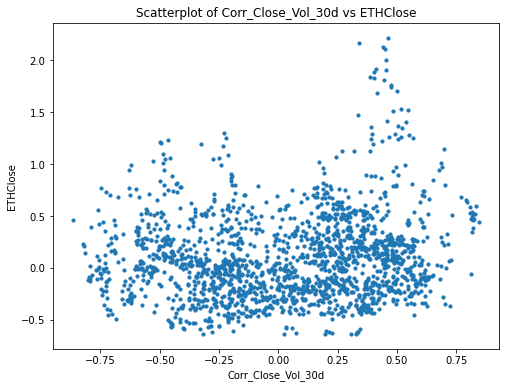

Pct Change Period is 40
Correlation between ETH and YTarget: 1.0



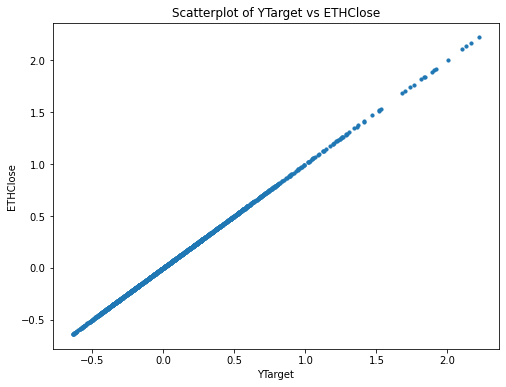

Pct Change Period is 45
Correlation between ETH and Corr_Close_Vol_30d: 0.1415709027158075



<Figure size 432x288 with 0 Axes>

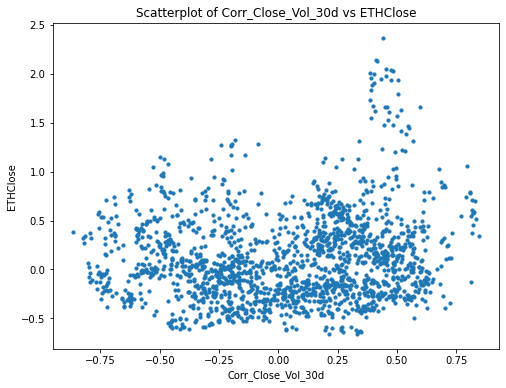

Pct Change Period is 45
Correlation between ETH and YTarget: 0.9401634741183239



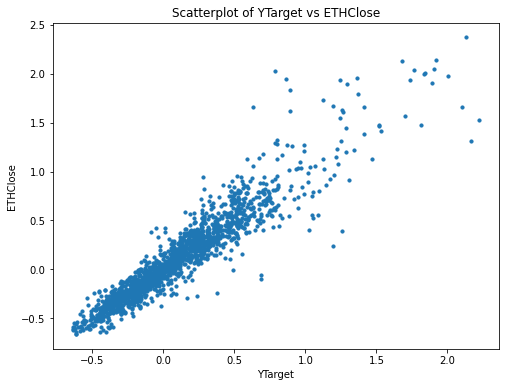

Pct Change Period is 50
Correlation between ETH and ZscoreClose: 0.11134645178677677



<Figure size 432x288 with 0 Axes>

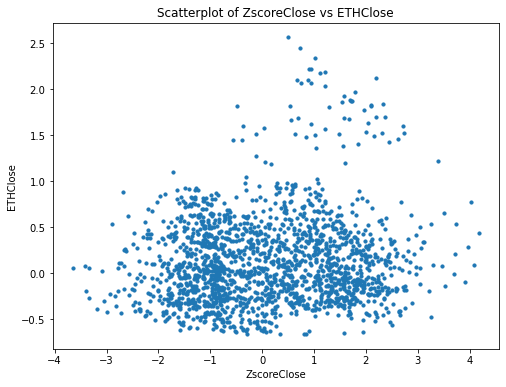

Pct Change Period is 50
Correlation between ETH and Corr_Close_Vol_30d: 0.15992818489168958



<Figure size 432x288 with 0 Axes>

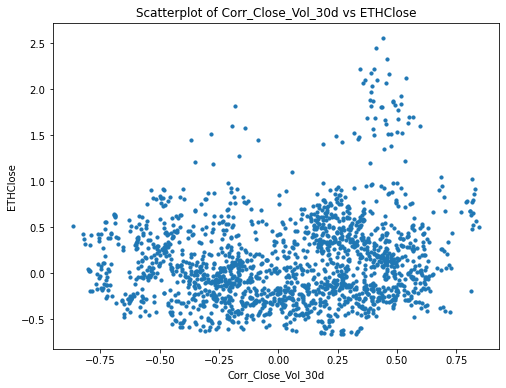

Pct Change Period is 50
Correlation between ETH and YTarget: 0.8862566645820218



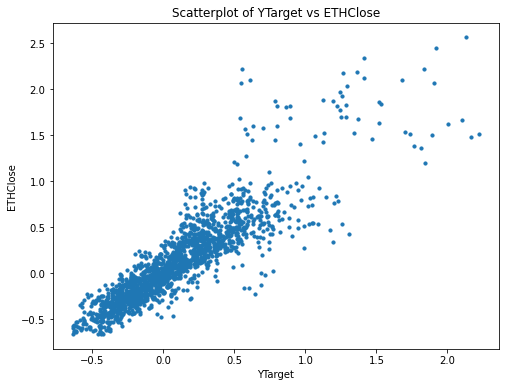

Pct Change Period is 55
Correlation between ETH and ClosePctile_20Day: 0.10390190410298072



<Figure size 432x288 with 0 Axes>

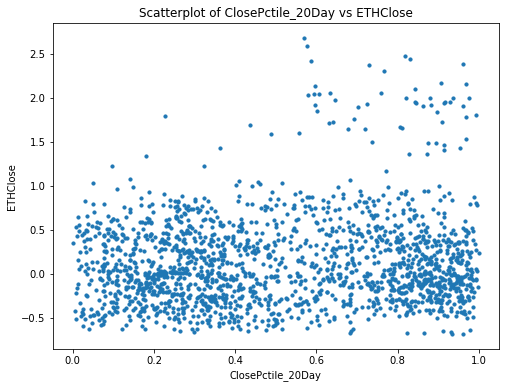

Pct Change Period is 55
Correlation between ETH and ZscoreClose: 0.13519189683365979



<Figure size 432x288 with 0 Axes>

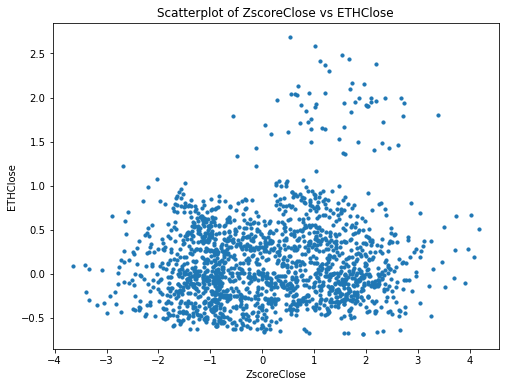

Pct Change Period is 55
Correlation between ETH and Corr_Close_Vol_30d: 0.1797248245072359



<Figure size 432x288 with 0 Axes>

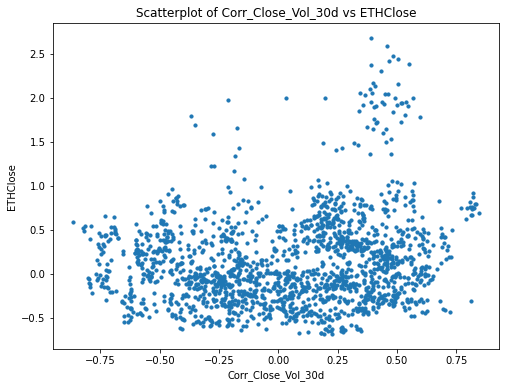

Pct Change Period is 55
Correlation between ETH and YTarget: 0.8364238665210829



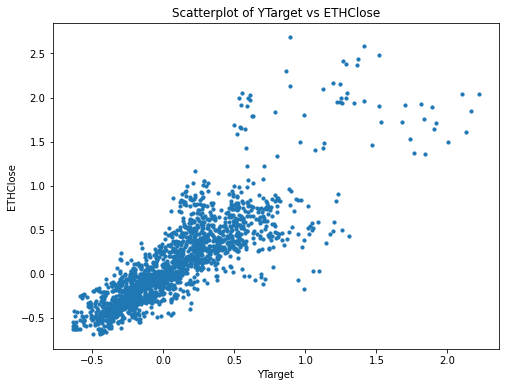

Pct Change Period is 60
Correlation between ETH and %Change_CMinusO_20DayPct: 0.10133189092624774



<Figure size 432x288 with 0 Axes>

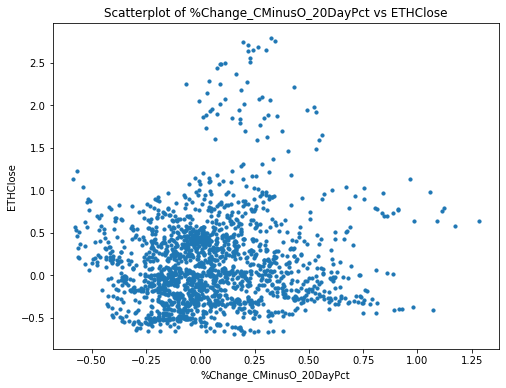

Pct Change Period is 60
Correlation between ETH and ClosePctile_20Day: 0.1408554242753447



<Figure size 432x288 with 0 Axes>

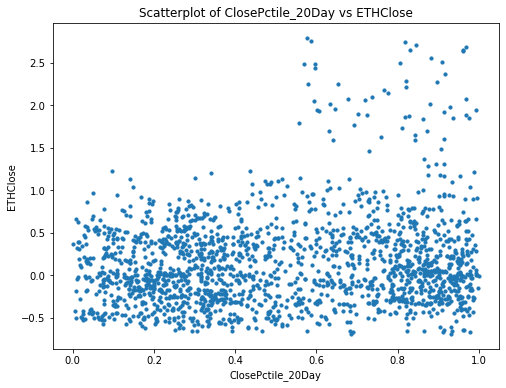

Pct Change Period is 60
Correlation between ETH and %Close_20d: 0.10044981059203381



<Figure size 432x288 with 0 Axes>

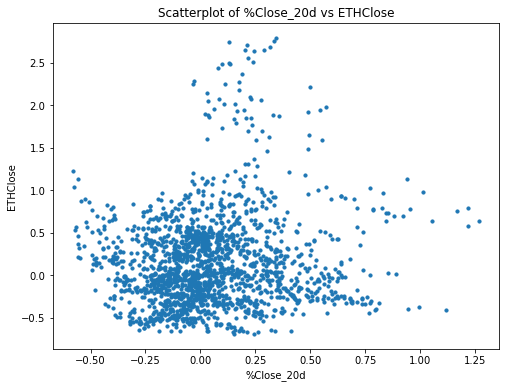

Pct Change Period is 60
Correlation between ETH and MA_30Slope: 0.12977138847191702



<Figure size 432x288 with 0 Axes>

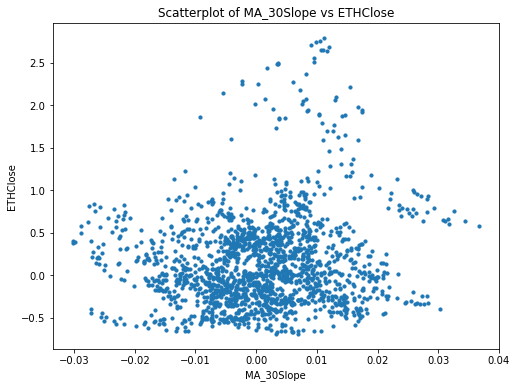

Pct Change Period is 60
Correlation between ETH and ZscoreClose: 0.16257546976224077



<Figure size 432x288 with 0 Axes>

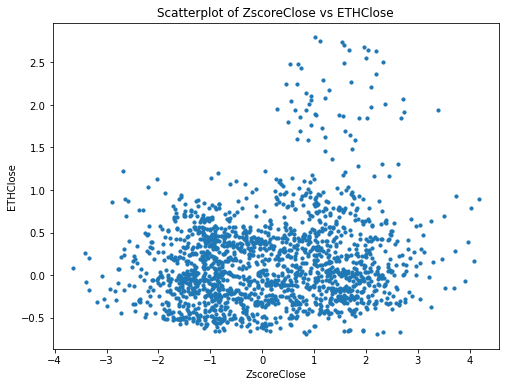

Pct Change Period is 60
Correlation between ETH and RSI_14: 0.10190105482636529



<Figure size 432x288 with 0 Axes>

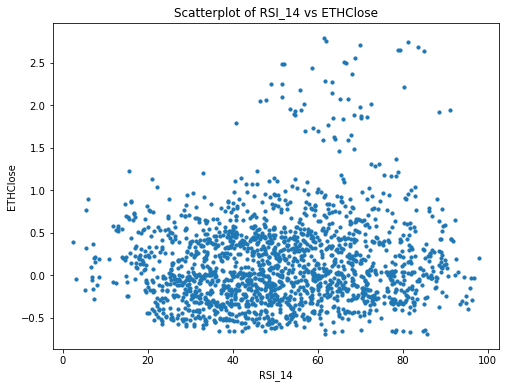

Pct Change Period is 60
Correlation between ETH and Corr_Close_Vol_30d: 0.20729288670159413



<Figure size 432x288 with 0 Axes>

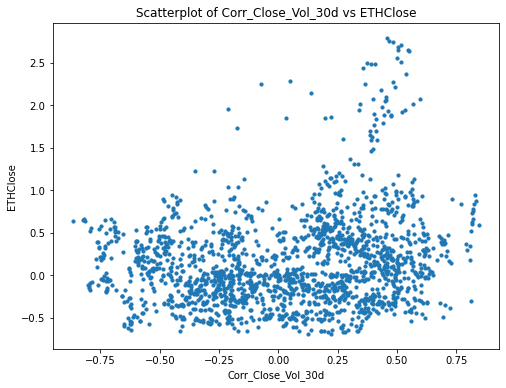

Pct Change Period is 60
Correlation between ETH and YTarget: 0.799372083734371



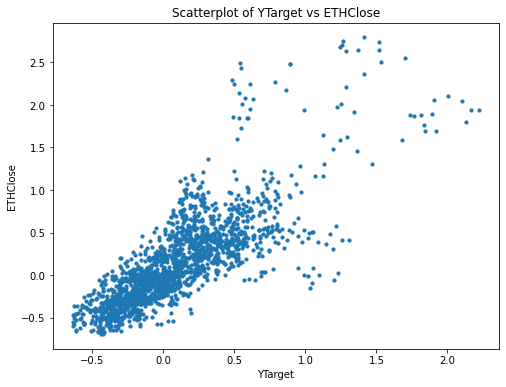

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

# Assuming you have 5 DataFrames named df1, df2, df3, df4, and df5
# Store them in a dictionary
dfYvar=df['Close']
df=df.drop(columns=['Close'])
#display(dfYvar)

# Create scatterplots and correlation matrices

for i in range(5,61,5):
    #for key1, df1 in dctStockDfs.items(0):
    for column_name, column_data in df.items():
        #display(df1.columns)
        #display(df2.columns)
        #print(type(column_data))
        dfcol=column_data
        #if key1 != key2:
        dfCorr=pd.concat([dfcol,dfYvar],join='inner',axis=1)
        #print(dfCorr.dtypes())
        dfCorr.iloc[:,1]=dfCorr.iloc[:,1].pct_change(i)
        dfCorr.iloc[:,1]=dfCorr.iloc[:,1].shift(-i)
        dfCorr=dfCorr.dropna()
        #display(dfCorr)
        # Create scatterplot
        plt.figure(figsize=(8, 6))
        plt.scatter(dfCorr.iloc[:,0], dfCorr.iloc[:,1],s=10)
        plt.title(f'Scatterplot of {column_name} vs ETHClose')
        plt.xlabel(dfCorr.columns[0])
        plt.ylabel('ETHClose')


        # Calculate correlation matrix
        corr = dfCorr.iloc[:,1].corr(dfCorr.iloc[:,0])
        if abs(corr)>=0.1:
            print(f'Pct Change Period is {i}')
            print(f'Correlation between ETH and {column_name}: {corr}\n')
            plt.show()
            
        else:
            plt.close()
            plt.clf()
        del(dfCorr)


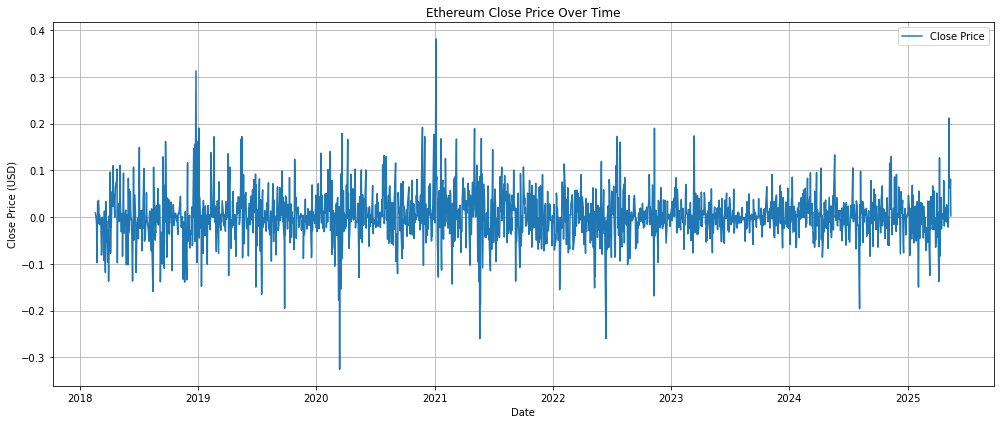

Index(['%Change_CMinusO_1DayPct', '%Change_CMinusO_3DayPct',
       '%Change_CMinusO_7DayPct', '%Change_CMinusO_20DayPct',
       'ClosePctile_1Day', 'ClosePctile_3Day', 'ClosePctile_7Day',
       'ClosePctile_20Day', '%Close_1d', '%Close_3d', '%Close_7d',
       '%Close_20d', 'MA_3Slope', 'MA_7Slope', 'MA_30Slope', 'MA_3Pct',
       'MA_7Pct', 'MA_30Pct', 'ZscoreClose', 'ZscoreVolume', 'RSI_14',
       'AutoCorr_Close_lag7', 'Corr_Close_Vol_30d', 'YTarget'],
      dtype='object')

In [8]:
# Step 4: Data Normalization

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['%Close_1d'], label='Close Price')
plt.title('Ethereum Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

display(df.columns)

Index(['%Change_CMinusO_1DayPct', '%Change_CMinusO_3DayPct',
       '%Change_CMinusO_7DayPct', '%Change_CMinusO_20DayPct',
       'ClosePctile_1Day', 'ClosePctile_3Day', 'ClosePctile_7Day',
       'ClosePctile_20Day', '%Close_1d', '%Close_3d', '%Close_7d',
       '%Close_20d', 'MA_3Slope', 'MA_7Slope', 'MA_30Slope', 'MA_3Pct',
       'MA_7Pct', 'MA_30Pct', 'ZscoreClose', 'ZscoreVolume', 'RSI_14',
       'AutoCorr_Close_lag7', 'Corr_Close_Vol_30d', 'YTarget'],
      dtype='object')

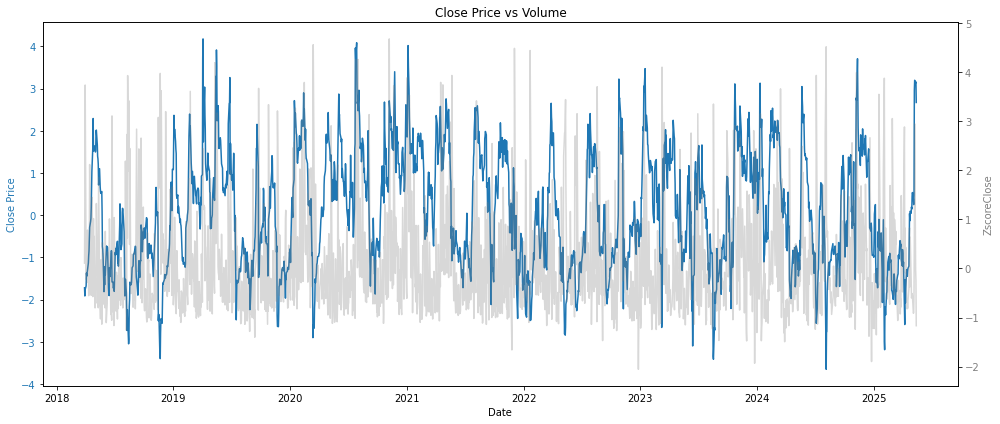

In [9]:
# Volume vs Close Price (Dual Axis)
display(df.columns)
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
#ax1.plot(df['Datetime'],df['ZscoreClose'], color='tab:blue', label='Close Price')
ax1.plot(df['ZscoreClose'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.set_ylabel('ZscoreClose', color='tab:gray')
#ax2.plot(df['Datetime'], df['ZscoreVolume'], color='tab:gray', alpha=0.3, label='Volume')
ax2.plot( df['ZscoreVolume'], color='tab:gray', alpha=0.3, label='Volume')
ax2.tick_params(axis='y', labelcolor='tab:gray')
plt.title('Close Price vs Volume')
fig.tight_layout()
plt.show()


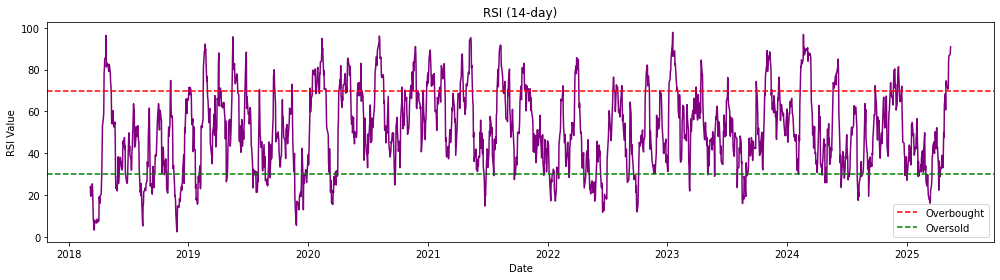

In [10]:
# RSI visualization

plt.figure(figsize=(14, 4))
#plt.plot(df['Datetime'], df['RSI_14'], color='purple')

plt.plot(df['RSI_14'], color='purple')

plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('RSI (14-day)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.tight_layout()
plt.show()


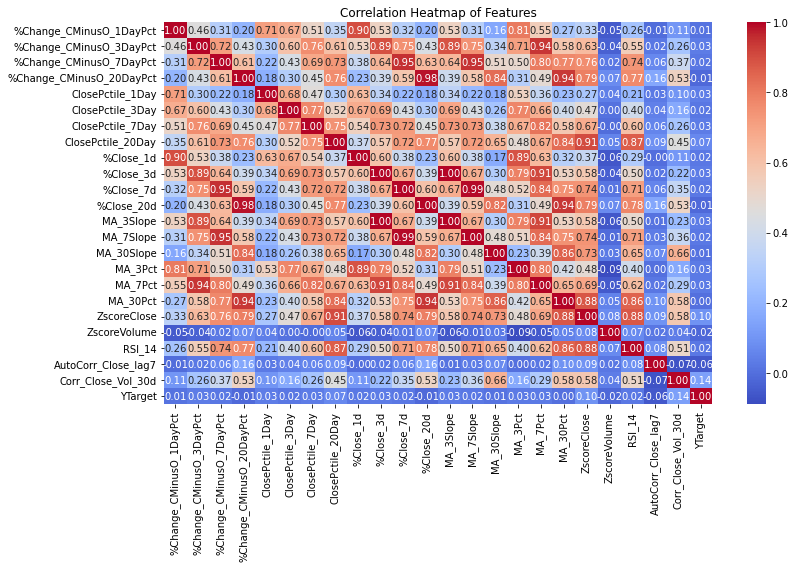

In [11]:
# Correlation Heatmap
import numpy as np
import seaborn as sns

plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()


In [12]:
'''import requests
import pandas as pd
import json

API_KEY = '7H58D0LVU1LNGWPH'
TICKERS = ['SMH','QQQ','SPY','USD']
START_DATE = '2015-01-01'
END_DATE = '2025-01-01'

def fetch_stock_data(symbol):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={API_KEY}'
    response = requests.get(url,timeout=60)
    data = response.json()

    if "Time Series (Daily)" not in data:
        print(f"Error fetching data for {symbol}: {data.get('Note') or data.get('Error Message')}")
        return None

    df = pd.DataFrame.from_dict(data['Time Series (Daily)'], orient='index')
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df = df.loc[START_DATE:END_DATE]
    df = df.astype(float)
    df=df[['close']]
    df=df.rename(columns={'close':symbol+'close'})
    return df


features_data = {}

for ticker in TICKERS:
    df = fetch_stock_data(ticker)
    if df is not None:
        features_data[ticker] = df
        print(f"\n{ticker} — {df.shape[0]} rows from {df.index.min().date()} to {df.index.max().date()}")
        display(df)
'''

'import requests\nimport pandas as pd\nimport json\n\nAPI_KEY = \'7H58D0LVU1LNGWPH\'\nTICKERS = [\'SMH\',\'QQQ\',\'SPY\',\'USD\']\nSTART_DATE = \'2015-01-01\'\nEND_DATE = \'2025-01-01\'\n\ndef fetch_stock_data(symbol):\n    url = f\'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={API_KEY}\'\n    response = requests.get(url,timeout=60)\n    data = response.json()\n\n    if "Time Series (Daily)" not in data:\n        print(f"Error fetching data for {symbol}: {data.get(\'Note\') or data.get(\'Error Message\')}")\n        return None\n\n    df = pd.DataFrame.from_dict(data[\'Time Series (Daily)\'], orient=\'index\')\n    df.columns = [\'open\', \'high\', \'low\', \'close\', \'volume\']\n    df.index = pd.to_datetime(df.index)\n    df = df.sort_index()\n    df = df.loc[START_DATE:END_DATE]\n    df = df.astype(float)\n    df=df[[\'close\']]\n    df=df.rename(columns={\'close\':symbol+\'close\'})\n    return df\n\n\nfeatures_data = {}\n\nfo

In [13]:
file_path = "Bitcoin_2018_To_Present.txt"  # Make sure this file is in your working directory
dfB = pd.read_csv(file_path)
# Combine Date and Time into a single datetime column
dfB['Datetime'] = pd.to_datetime(dfB['Date'] + ' ' + dfB['Time'], format='%m/%d/%Y %H:%M')
# Drop unnecessary columns: 'Date', 'Time', and 'OI' since OI is all zeros
dfB.drop(['Date', 'Time', 'OI'], axis=1, inplace=True)
# Reorder the columns for better readability
dfB = dfB[['Datetime', 'Open', 'High', 'Low', 'Close', 'Vol']]
# Print the first few rows to confirm
print(dfB.head())
# Check data types to confirm 'Datetime' is correctly formatted
print(dfB.dtypes)
dfB = dfB.set_index('Datetime')
dfB

             Datetime      Open      High      Low     Close   Vol
0 2018-02-15 15:59:00   9710.99  10249.81   9550.0  10070.01  3932
1 2018-02-16 15:59:00  10094.90  10307.68   9730.0  10199.00  3432
2 2018-02-19 15:59:00  10186.99  11274.11  10057.0  11088.93  3134
3 2018-02-20 15:59:00  11088.93  11775.00  11055.7  11725.99  3550
4 2018-02-21 15:59:00  11711.77  11750.00  10250.0  10263.00  5957
Datetime    datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Vol                  int64
dtype: object


,Open,High,Low,Close,Vol
Datetime,,,,,
2018-02-15 15:59:00,9710.99,10249.81,9550.00,10070.01,3932
2018-02-16 15:59:00,10094.90,10307.68,9730.00,10199.00,3432
2018-02-19 15:59:00,10186.99,11274.11,10057.00,11088.93,3134
2018-02-20 15:59:00,11088.93,11775.00,11055.70,11725.99,3550
2018-02-21 15:59:00,11711.77,11750.00,10250.00,10263.00,5957
...,...,...,...,...,...
2025-05-08 15:59:00,96804.90,102842.27,96683.06,102484.21,1348
2025-05-09 15:59:00,102626.26,104352.60,102124.41,103203.83,862
2025-05-12 15:59:00,104299.66,105787.37,100703.71,102706.30,758


In [14]:
# Step 3: Feature Engineering (Improved version)
tickerB='B'
# Basic Features
dfB[tickerB+'Daily_Range'] = dfB['High'] - dfB['Low']
#dfB['Price_Change'] = dfB['Close'] - dfB['Open']
dfB[tickerB+'%Change_CMinusO_1DayPct'] = ((dfB['Close'] - dfB['Open']) / dfB['Open'])
dfB[tickerB+'%Change_CMinusO_3DayPct'] = ((dfB['Close'] - dfB['Open'].shift(3)) / dfB['Open'].shift(3))
dfB[tickerB+'%Change_CMinusO_7DayPct'] = ((dfB['Close'] - dfB['Open'].shift(7)) / dfB['Open'].shift(7))
dfB[tickerB+'%Change_CMinusO_20DayPct'] = ((dfB['Close'] - dfB['Open'].shift(20)) / dfB['Open'].shift(20))    

dfB[tickerB+'ClosePctile_1Day']=(dfB['Close'] - dfB['Low']) / (dfB['High']-dfB['Low'])
dfB[tickerB+'ClosePctile_3Day']=(dfB['Close'] - dfB['Low'].rolling(3).min()) / (dfB['High'].rolling(3).max()-dfB['Low'].rolling(3).min())
dfB[tickerB+'ClosePctile_7Day']=(dfB['Close'] - dfB['Low'].rolling(7).min()) / (dfB['High'].rolling(7).max()-dfB['Low'].rolling(7).min())
dfB[tickerB+'ClosePctile_20Day']=(dfB['Close'] - dfB['Low'].rolling(20).min()) / (dfB['High'].rolling(20).max()-dfB['Low'].rolling(20).min())
                                 
dfB[tickerB+'%Close_1d']=dfB['Close'].pct_change(1)
dfB[tickerB+'%Close_3d']=dfB['Close'].pct_change(3)
dfB[tickerB+'%Close_7d']=dfB['Close'].pct_change(7)
dfB[tickerB+'%Close_20d']=dfB['Close'].pct_change(20)                                 
                                 
                                 
dfB[tickerB+'MA_3'] = dfB['Close'].rolling(window=3).mean()                                 
dfB[tickerB+'MA_7'] = dfB['Close'].rolling(window=7).mean()
dfB[tickerB+'MA_30'] = dfB['Close'].rolling(window=30).mean()

# Additional Advanced Features (recommended by professor)
dfB[tickerB+'MA_3Slope'] = dfB[tickerB+'MA_3'].pct_change()                             
dfB[tickerB+'MA_7Slope'] = dfB[tickerB+'MA_7'].pct_change()
dfB[tickerB+'MA_30Slope'] = dfB[tickerB+'MA_30'].pct_change()
                                 
dfB[tickerB+'MA_3Pct'] = dfB['Close']/dfB[tickerB+'MA_3']              
dfB[tickerB+'MA_7Pct'] = dfB['Close']/dfB[tickerB+'MA_7']
dfB[tickerB+'MA_30Pct'] = dfB['Close']/dfB[tickerB+'MA_30']
                                 
#Close and Volume rolling ZScores
                                 
dfB[tickerB+'ZscoreClose']=(dfB['Close']- dfB['Close'].rolling(window=30).mean())/dfB['Close'].rolling(window=30).std()
dfB[tickerB+'ZscoreVolume']=(dfB['Vol']- dfB['Vol'].rolling(window=30).mean())/dfB['Vol'].rolling(window=30).std()

dfB=dfB.drop(columns=['Open', 'High', 'Low',  'Vol','Close'])
dfB=dfB.drop(columns=[tickerB+'MA_3',tickerB+'MA_7',tickerB+'MA_30',tickerB+'Daily_Range',tickerB+'ZscoreClose',tickerB+'ZscoreVolume'])                                 
#dfB=dfB.drop(columns=['Open', 'High', 'Low',  'Vol','BMA_3','BMA_7','BMA_30','BDaily_Range','B%Change_Close'])#,'ZscoreClose','ZscoreVolume'])                                
display(dfB)

df=pd.concat([dfB,df],axis=1,join='inner')
df=df.dropna()
display(df.head)

,B%Change_CMinusO_1DayPct,B%Change_CMinusO_3DayPct,B%Change_CMinusO_7DayPct,B%Change_CMinusO_20DayPct,BClosePctile_1Day,BClosePctile_3Day,BClosePctile_7Day,BClosePctile_20Day,B%Close_1d,B%Close_3d,B%Close_7d,B%Close_20d,BMA_3Slope,BMA_7Slope,BMA_30Slope,BMA_3Pct,BMA_7Pct,BMA_30Pct
Datetime,,,,,,,,,,,,,,,,,,
2018-02-15 15:59:00,0.036970,NaN,NaN,NaN,0.743073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-16 15:59:00,0.010312,NaN,NaN,NaN,0.811868,NaN,NaN,NaN,0.012809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-19 15:59:00,0.088538,NaN,NaN,NaN,0.847853,0.892594,NaN,NaN,0.087257,NaN,NaN,NaN,NaN,NaN,NaN,1.060873,NaN,NaN
2018-02-20 15:59:00,0.057450,0.207497,NaN,NaN,0.931864,0.976034,NaN,NaN,0.057450,0.164447,NaN,NaN,0.052809,NaN,NaN,1.065550,NaN,NaN
2018-02-21 15:59:00,-0.123702,0.016652,NaN,NaN,0.008667,0.119907,NaN,NaN,-0.124765,0.006275,NaN,NaN,0.001939,NaN,NaN,0.930802,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-08 15:59:00,0.058668,0.070507,0.084506,0.232049,0.941866,0.962226,0.963943,0.985032,0.059054,0.087365,0.079906,0.284011,0.028816,0.011339,0.005746,1.045815,1.060652,1.158154
2025-05-09 15:59:00,0.005628,0.095091,0.087885,0.291908,0.484438,0.883913,0.895465,0.946175,0.007022,0.089452,0.091128,0.230913,0.028824,0.012744,0.007322,1.023652,1.054660,1.157808
2025-05-12 15:59:00,-0.015277,0.084546,0.085948,0.230291,0.393927,0.661581,0.752008,0.864266,-0.004821,0.061349,0.064489,0.209449,0.019628,0.009084,0.007586,0.999107,1.040127,1.143552


<bound method NDFrame.head of                      B%Change_CMinusO_1DayPct  B%Change_CMinusO_3DayPct  \
Datetime                                                                  
2018-05-08 15:59:00                 -0.028941                 -0.001744   
2018-05-09 15:59:00                  0.009837                 -0.040420   
2018-05-10 15:59:00                 -0.016064                 -0.044184   
2018-05-11 15:59:00                 -0.072846                 -0.106015   
2018-05-14 15:59:00                  0.014916                 -0.034389   
...                                       ...                       ...   
2025-03-13 15:59:00                 -0.033489                 -0.033250   
2025-03-14 15:59:00                  0.048043                  0.062214   
2025-03-17 15:59:00                  0.007952                  0.013328   
2025-03-18 15:59:00                 -0.023305                 -0.013179   
2025-03-19 15:59:00                  0.040622                  0.06277

40
Pct Change Period is 40
Correlation between ETH and B%Change_CMinusO_3DayPct: 0.10706017887191471



<Figure size 432x288 with 0 Axes>

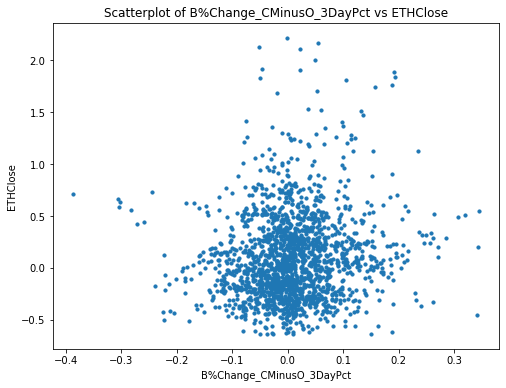

Pct Change Period is 40
Correlation between ETH and B%Change_CMinusO_7DayPct: 0.13501425582913848



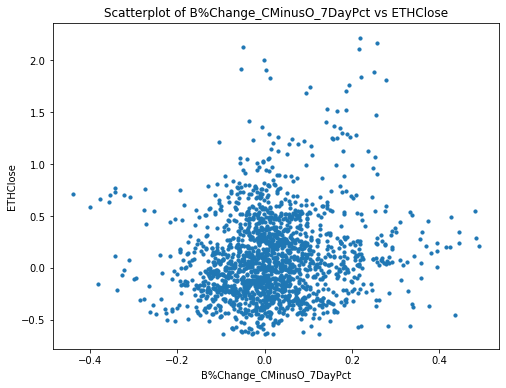

Pct Change Period is 40
Correlation between ETH and B%Change_CMinusO_20DayPct: 0.15789029567713622



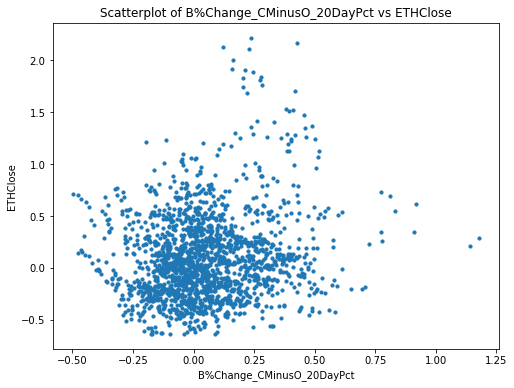

Pct Change Period is 40
Correlation between ETH and BClosePctile_3Day: 0.1005924107306306



<Figure size 432x288 with 0 Axes>

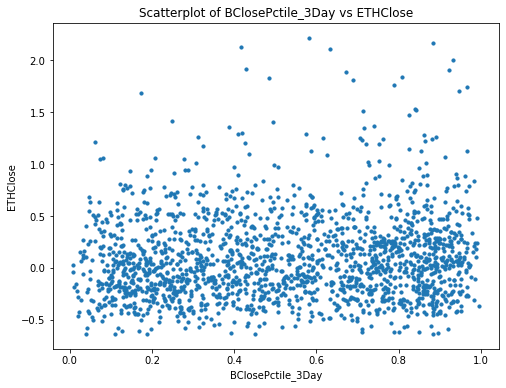

Pct Change Period is 40
Correlation between ETH and BClosePctile_7Day: 0.1311239843529975



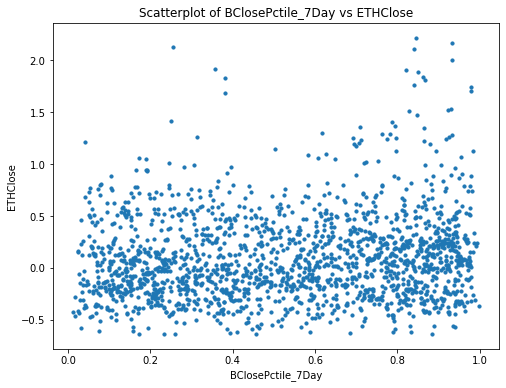

Pct Change Period is 40
Correlation between ETH and BClosePctile_20Day: 0.1786046988427857



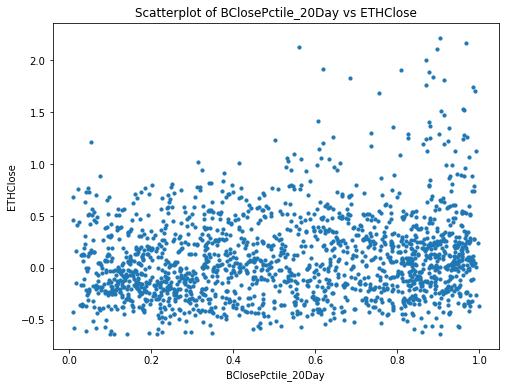

Pct Change Period is 40
Correlation between ETH and B%Close_7d: 0.13226337672096034



<Figure size 432x288 with 0 Axes>

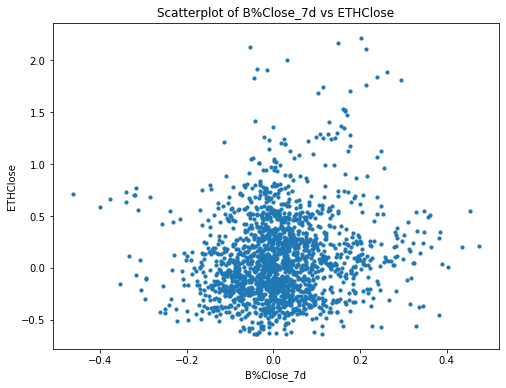

Pct Change Period is 40
Correlation between ETH and B%Close_20d: 0.15549483982831652



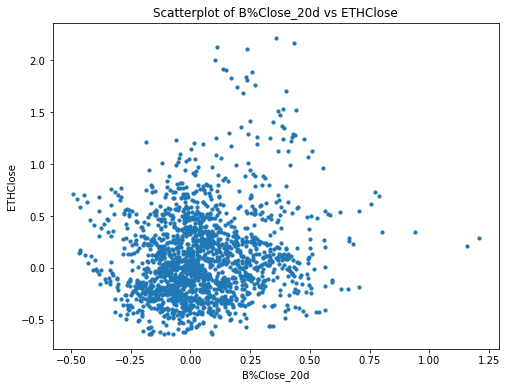

Pct Change Period is 40
Correlation between ETH and BMA_7Slope: 0.12643024751085694



<Figure size 432x288 with 0 Axes>

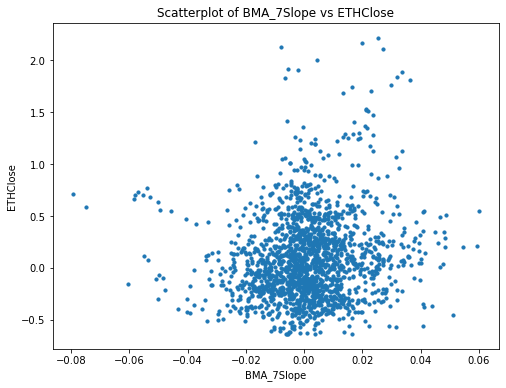

Pct Change Period is 40
Correlation between ETH and BMA_30Slope: 0.1502424187792519



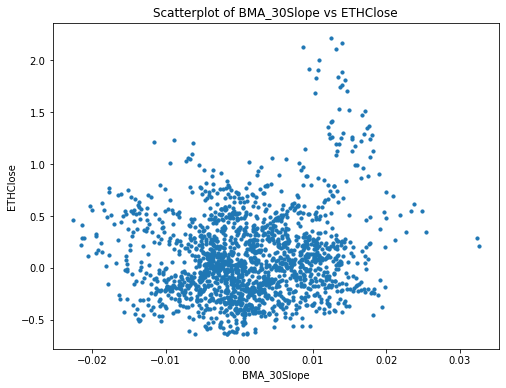

Pct Change Period is 40
Correlation between ETH and BMA_7Pct: 0.11294859819526114



<Figure size 432x288 with 0 Axes>

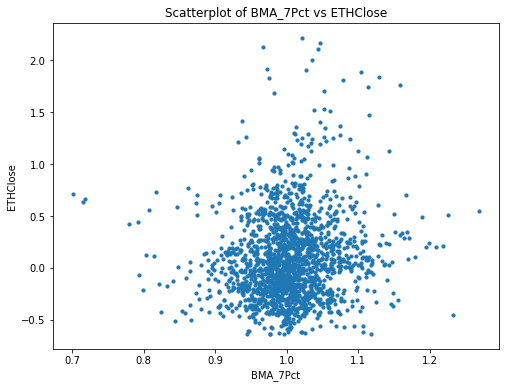

Pct Change Period is 40
Correlation between ETH and BMA_30Pct: 0.16258146272685683



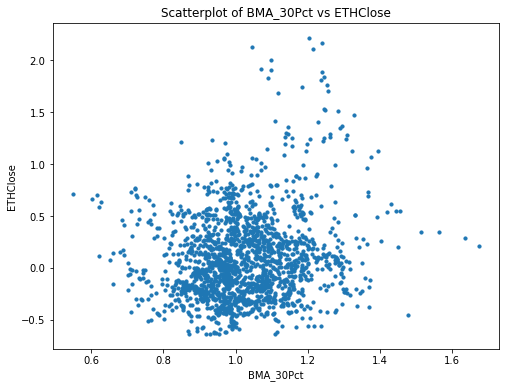

Pct Change Period is 40
Correlation between ETH and ZscoreClose: 0.11235115068570449



<Figure size 432x288 with 0 Axes>

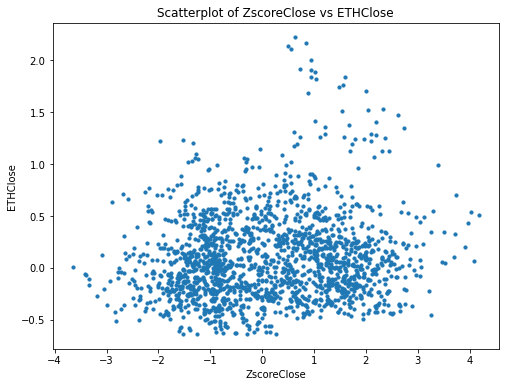

Pct Change Period is 40
Correlation between ETH and Corr_Close_Vol_30d: 0.13506200086370992



<Figure size 432x288 with 0 Axes>

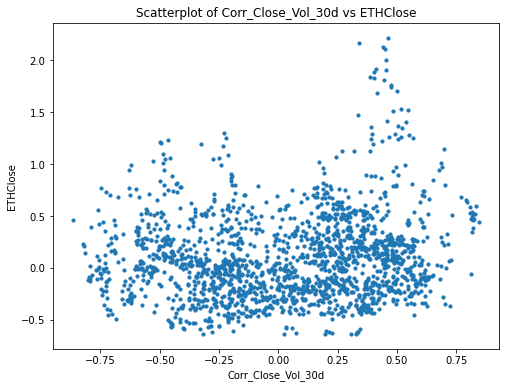

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

# Assuming you have 5 DataFrames named df1, df2, df3, df4, and df5
# Store them in a dictionary
dfEDA=df.copy()
dfYvar=df['YTarget']
dfEDA=dfEDA.drop(columns=['YTarget'])
#display(dfYvar)

# Create scatterplots and correlation matrices

for i in range(40,41,1):
    print(i)
    #for key1, df1 in dctStockDfs.items(0):
    for column_name, column_data in dfEDA.items():
        #display(df1.columns)
        #display(df2.columns)
        #print(type(column_data))
        dfcol=column_data
        #if key1 != key2:
        dfCorr=pd.concat([dfcol,dfYvar],join='inner',axis=1)
        #display(dfCorr)
        #print(dfCorr.dtypes())
        #dfCorr.iloc[:,1]=dfCorr.iloc[:,1].pct_change(i)
        #dfCorr.iloc[:,1]=dfCorr.iloc[:,1].shift(-i)
        dfCorr=dfCorr.dropna()
        #display(dfCorr)
        # Create scatterplot
        plt.figure(figsize=(8, 6))
        plt.scatter(dfCorr.iloc[:,0], dfCorr.iloc[:,1],s=10)
        plt.title(f'Scatterplot of {column_name} vs ETHClose')
        plt.xlabel(dfCorr.columns[0])
        plt.ylabel('ETHClose')


        # Calculate correlation matrix
        corr = dfCorr.iloc[:,1].corr(dfCorr.iloc[:,0])
        #print(corr)
        if abs(corr)>=0.1:
            print(f'Pct Change Period is {i}')
            print(f'Correlation between ETH and {column_name}: {corr}\n')
            plt.show()
            
        else:
            plt.close()
            plt.clf()
        del(dfCorr)


In [16]:
dfEDA.head()

,B%Change_CMinusO_1DayPct,B%Change_CMinusO_3DayPct,B%Change_CMinusO_7DayPct,B%Change_CMinusO_20DayPct,BClosePctile_1Day,BClosePctile_3Day,BClosePctile_7Day,BClosePctile_20Day,B%Close_1d,B%Close_3d,...,MA_7Slope,MA_30Slope,MA_3Pct,MA_7Pct,MA_30Pct,ZscoreClose,ZscoreVolume,RSI_14,AutoCorr_Close_lag7,Corr_Close_Vol_30d
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-05-08 15:59:00,-0.028941,-0.001744,0.004937,0.374203,0.266260,0.146667,0.339382,0.788934,-0.028734,-0.049768,...,0.017745,0.017254,0.970709,1.023755,1.356285,1.396774,-0.399756,73.609014,0.972528,-0.226898
2018-05-09 15:59:00,0.009837,-0.040420,-0.004737,0.353151,0.707585,0.430539,0.432395,0.818652,0.009837,-0.044893,...,0.014770,0.018223,0.995728,1.016799,1.342501,1.334909,-0.745433,72.016518,0.977840,-0.261801
2018-05-10 15:59:00,-0.016064,-0.044184,-0.019076,0.320120,0.117156,0.269354,0.161333,0.661958,-0.016712,-0.035571,...,0.014371,0.021157,0.996262,0.992890,1.302222,1.202107,-0.800490,68.012928,0.977694,-0.223273
2018-05-11 15:59:00,-0.072846,-0.106015,-0.064460,0.090939,0.070457,0.052627,0.037296,0.308878,-0.072845,-0.079371,...,-0.000701,0.017047,0.939592,0.910533,1.173367,0.715622,1.850589,54.240116,0.972794,-0.005993
2018-05-14 15:59:00,0.014916,-0.034389,-0.036072,0.065826,0.940683,0.506334,0.367638,0.517189,0.048861,-0.043795,...,-0.002939,0.020895,1.030532,0.999275,1.257662,1.102131,-0.212346,53.979718,0.969399,-0.037382


In [17]:
dfEDA=df.copy()

In [18]:
'''# Calculate the split index
split_point = int(len(dfEDA) * 0.66)

# Split into training and test sets
train = df.iloc[:split_point]
test = df.iloc[split_point:]'''

split_point = int(len(dfEDA) * 0.66)

X=dfEDA.drop(columns=['YTarget'])
Y=dfEDA['YTarget']
Xtrain=X[:split_point]
Xtest=X[split_point:]
Ytrain=Y[:split_point]
Ytest=Y[split_point:]

In [21]:
Ytrain

Datetime
2018-05-08 15:59:00   -0.365135
2018-05-09 15:59:00   -0.361919
2018-05-10 15:59:00   -0.371574
2018-05-11 15:59:00   -0.305763
2018-05-14 15:59:00   -0.356453
                         ...   
2022-11-11 15:59:00   -0.000166
2022-11-14 15:59:00    0.074525
2022-11-15 15:59:00    0.076667
2022-11-16 15:59:00    0.112489
2022-11-17 15:59:00    0.182914
Name: YTarget, Length: 1180, dtype: float64

In [22]:
Ytest

Datetime
2022-11-18 15:59:00    0.205618
2022-11-21 15:59:00    0.447275
2022-11-22 15:59:00    0.399046
2022-11-23 15:59:00    0.307076
2022-11-24 15:59:00    0.284861
                         ...   
2025-03-13 15:59:00    0.181355
2025-03-14 15:59:00    0.215321
2025-03-17 15:59:00    0.285810
2025-03-18 15:59:00    0.411314
2025-03-19 15:59:00    0.326547
Name: YTarget, Length: 608, dtype: float64